In [7]:
# importing necessary libraries 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [8]:
# taking input image size and the path for the test and train data set 
IMAGE_SIZE = [224, 224]
train_path = '/Users/gvamsikrishna/Desktop/cotton dicease /data 2/train'
valid_path = '/Users/gvamsikrishna/Desktop/cotton dicease /data 2/test'

In [10]:
#Loading inceptionneV3 from keras 
inception = InceptionV3(input_shape = IMAGE_SIZE+[3],include_top=False,weights='imagenet')

87924736/87910968 [==============================] - 16s 0us/step


In [11]:
#setting layers to non - trainable 
for layer in inception.layers:
    layer.trainable = False

In [12]:
# checking the no of output layers 
folders = glob('/Users/gvamsikrishna/Desktop/cotton dicease /data 2/train/*')

In [15]:
# flattening the output 
x = Flatten()(inception.output)

In [16]:
# creating THE  MODEL 
predictions = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = inception.input,outputs = predictions)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [18]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['Accuracy'])

In [20]:
#train and test data generation 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# train data 
training_set = train_datagen.flow_from_directory('/Users/gvamsikrishna/Desktop/cotton dicease /data 2/train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical'
                                                )

Found 1951 images belonging to 4 classes.


In [24]:
#test data 
testing_set = test_datagen.flow_from_directory('/Users/gvamsikrishna/Desktop/cotton dicease /data 2/test',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical'
                                                )

Found 18 images belonging to 4 classes.


In [29]:
# Model generation 
MODEL = model.fit_generator(
  training_set,
  validation_data=testing_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(testing_set)
)

<ipython-input-29-3254fc2e8177>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  MODEL = model.fit_generator(


Epoch 1/10
61/61 [==============================] - 134s 2s/step - loss: 0.6399 - Accuracy: 0.8857 - val_loss: 0.1691 - val_Accuracy: 0.8889
Epoch 2/10
61/61 [==============================] - 126s 2s/step - loss: 0.6010 - Accuracy: 0.8995 - val_loss: 0.0528 - val_Accuracy: 0.9444
Epoch 3/10
61/61 [==============================] - 145s 2s/step - loss: 0.5118 - Accuracy: 0.9206 - val_loss: 0.1013 - val_Accuracy: 0.9444
Epoch 4/10
61/61 [==============================] - 126s 2s/step - loss: 0.6713 - Accuracy: 0.9077 - val_loss: 0.0462 - val_Accuracy: 0.9444
Epoch 5/10
61/61 [==============================] - 125s 2s/step - loss: 0.5366 - Accuracy: 0.9175 - val_loss: 0.2138 - val_Accuracy: 0.9444
Epoch 6/10
61/61 [==============================] - 128s 2s/step - loss: 0.5414 - Accuracy: 0.9195 - val_loss: 0.4943 - val_Accuracy: 0.8889
Epoch 7/10
61/61 [==============================] - 126s 2s/step - loss: 0.5896 - Accuracy: 0.9247 - val_loss: 0.0842 - val_Accuracy: 0.9444
Epoch 8/10
61

In [30]:
import matplotlib.pyplot as plt 

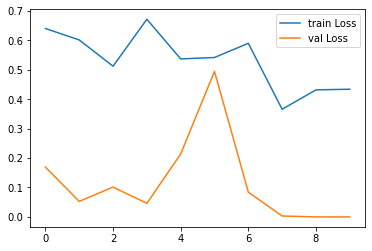

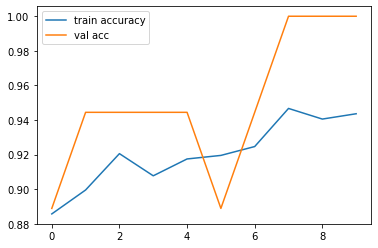

<Figure size 432x288 with 0 Axes>

In [33]:
# plotting the Losses 
plt.plot(MODEL.history['loss'], label='train Loss')
plt.plot(MODEL.history['val_loss'], label='val Loss')
plt.legend()
plt.show()
plt.savefig('loss_valloss')
plt.plot(MODEL.history['Accuracy'], label='train accuracy')
plt.plot(MODEL.history['val_Accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('acc_valAcc')

In [34]:
model.save('cotton_disease_inception.h5')